In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [19]:
data = pd.read_csv('heartD_to_Age-restingbps.csv')


X = data[['age', 'trestbps']]
y = data['heart_disease']

data

,heart_disease,age,trestbps
0,0,63,145
1,1,67,160
2,1,67,120
3,0,37,130
4,0,41,130
...,...,...,...
292,1,57,140
293,1,45,110
294,1,68,144
295,1,57,130


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[26 10]
 [14 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.68        36
           1       0.50      0.42      0.45        24

    accuracy                           0.60        60
   macro avg       0.57      0.57      0.57        60
weighted avg       0.59      0.60      0.59        60



D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


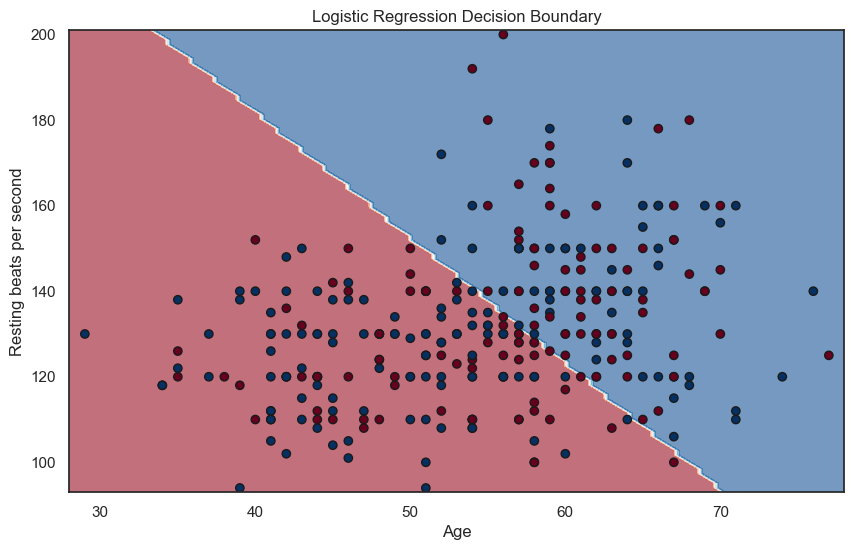

In [24]:
# Define a meshgrid of points for visualization
xx, yy = np.meshgrid(np.linspace(X['age'].min() - 1, X['age'].max() + 1, 100),
                     np.linspace(X['trestbps'].min() - 1, X['trestbps'].max() + 1, 100))

# Use the model to make predictions on the meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundary
plt.figure(figsize=(10, 6))
sns.set(style="white")
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X['age'], X['trestbps'], c=y, cmap=plt.cm.RdBu_r, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Resting beats per second')
plt.title('Logistic Regression Decision Boundary')
plt.show()